In [2]:
import os
import sys
import json
sys.path.insert(0, os.path.abspath(os.path.join('', os.pardir)))
analysis_dir = os.path.abspath(os.path.join('', os.pardir))
sys.path.insert(0, os.path.abspath(os.path.join(analysis_dir, os.pardir)))
from utils.misc import read_json_file
from src.ml.helper.utils import parse_traces_config
import matplotlib.pyplot as plt
harm_dir = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm"

ml_dir: /home/lorenzo/Desktop/mimic-2/src/ml | src_dir: /home/lorenzo/Desktop/mimic-2/src | entry_dir: /home/lorenzo/Desktop/mimic-2 




In [3]:
import os
import sys
import json
sys.path.insert(0, os.path.abspath(os.path.join('', os.pardir)))
analysis_dir = os.path.abspath(os.path.join('', os.pardir))
sys.path.insert(0, os.path.abspath(os.path.join(analysis_dir, os.pardir)))
from utils.misc import read_json_file
from src.ml.helper.utils import parse_traces_config
import matplotlib.pyplot as plt

In [4]:
def get_metrics(config):
    rtts = []
    cwnds = [] 
    s_rate = []
    for intervals in config['intervals']:
        s_rate.append(intervals['streams'][0]['bits_per_second']*10**(-6))
        cwnds.append(intervals['streams'][0]['snd_cwnd'])
        rtts.append(intervals['streams'][0]['rtt']*10**(-3))
    thruput = config["end"]["streams"][0]["receiver"]["bits_per_second"]*10**(-6)
    return thruput, rtts, cwnds, s_rate

In [5]:
cubic_against_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.cubic.against.2023.05.30.22.44.03.json"
bbr_against_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.bbr.against.2023.05.30.22.46.18.json"
hybla_against_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.hybla.against.2023.05.30.22.47.45.json"
vegas_against_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.vegas.against.2023.05.30.22.49.05.json"
pcc_against_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.pcc.against.2023.05.30.22.51.17.json"

mutant_against_cubic_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.bootstrapped_ucb.2023.05.30.22.44.04.json"
mutant_against_bbr_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.bootstrapped_ucb.2023.05.30.22.46.19.json"
mutant_against_hybla_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.bootstrapped_ucb.2023.05.30.22.47.46.json"
mutant_against_vegas_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.bootstrapped_ucb.2023.05.30.22.49.06.json"
mutant_against_pcc_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.bootstrapped_ucb.2023.05.30.22.51.18.json"

cubic_solo_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.cubic.solo.2023.05.30.23.43.59.json"
bbr_solo_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.bbr.solo.2023.05.30.23.32.33.json"
hybla_solo_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.hybla.solo.2023.05.30.23.36.09.json"
vegas_solo_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.vegas.solo.2023.05.30.23.40.24.json"
pcc_solo_iperf_file = "/home/lorenzo/Desktop/mimic-2/log/iperf/harm/tm.lte.driving.pcc.solo.2023.05.30.23.45.07.json"

In [6]:
against_list = [cubic_against_iperf_file, bbr_against_iperf_file, hybla_against_iperf_file, vegas_against_iperf_file, pcc_against_iperf_file]
solo_list = [cubic_solo_iperf_file, bbr_solo_iperf_file, hybla_solo_iperf_file, vegas_solo_iperf_file, pcc_solo_iperf_file]
mutant_list = [mutant_against_cubic_iperf_file, mutant_against_bbr_iperf_file, mutant_against_hybla_iperf_file, mutant_against_vegas_iperf_file, mutant_against_pcc_iperf_file]

In [7]:
import numpy as np
protocols = ["cubic", "bbr", "hybla", "vegas", "pcc"]
tput_dict = {}
delay_dict = {}
tput_dict["against"] = []
tput_dict["solo"] = []
delay_dict["against"] = []
delay_dict["solo"] = []
h_tput_list = []
h_delay_list = []
for i, p in enumerate(protocols):
    # Get iperf configs
    against_config = read_json_file(against_list[i])
    solo_config = read_json_file(solo_list[i])
    mimic_config = read_json_file(mutant_list[i])
    # Get protocol tput
    p_thruput, p_rtts, _, _ = get_metrics(against_config)
    if i == 0:
        p_thruput = p_thruput - 1
    p_rtt = np.mean(p_rtts)/2
    # Get Mutant tput
    m_thruput, m_rtts, _, _ = get_metrics(mimic_config)
    m_rtt = np.mean(m_rtts)/2
    # Get protocol solo tput
    solo_thruput, solo_rtts, _, _ = get_metrics(solo_config)
    solo_rtt = np.mean(solo_rtts)/2
    # Compute harmness
    h_tput_list.append((solo_thruput - p_thruput)/solo_thruput)
    h_delay_list.append((p_rtt - solo_rtt)/p_rtt)
    tput_dict["against"].append(p_thruput)
    tput_dict["solo"].append(solo_thruput)
    delay_dict["against"].append(p_rtt)
    delay_dict["solo"].append(solo_rtt)
    print(p_thruput, solo_thruput)

28.228746822638 29.227646825456
21.051358855525 14.829966635856998
29.067192295294 29.205136435958998
4.887657243774999 4.994189851291
27.73061106501 27.242235549432998


In [8]:
tput_dict["against"][0] = tput_dict["against"][0]-1 

In [9]:
tput_dict

{'against': [27.228746822638,
  21.051358855525,
  29.067192295294,
  4.887657243774999,
  27.73061106501],
 'solo': [29.227646825456,
  14.829966635856998,
  29.205136435958998,
  4.994189851291,
  27.242235549432998]}

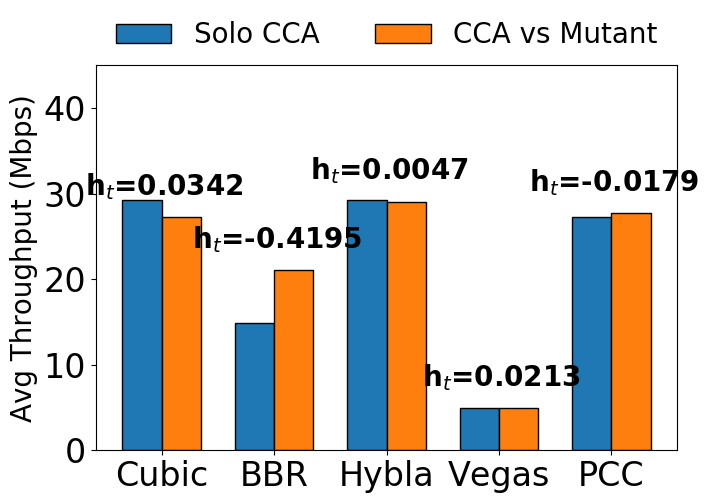

In [40]:
bar_labels = ['Cubic', 'BBR', 'Hybla', 'Vegas', 'PCC']
bar_positions = np.arange(len(bar_labels))
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Width of each bar
bar_width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7.5,5))

for j, type in enumerate(["solo", "against"]):
    # Calculate the x-coordinate for the current protocol's bars
    x = bar_positions + (j * bar_width)    
    # Plot the bars
    ax.bar(x, tput_dict[type], bar_width,  
           label="Solo CCA" if j==0 else f"CCA vs Mutant",
           edgecolor='black', color=bar_colors[j])
for i, val in enumerate(tput_dict["against"]):
    ax.text(x[i]-0.15, val + 1.8, f"h$_t$={round(h_tput_list[i], 4)}", 
            ha='center', va='bottom', fontsize=20, fontweight="bold")
# Set the x-axis ticks and labels
ax.set_xticks(bar_positions + (bar_width) / 2)
ax.set_xticklabels(bar_labels, fontsize=24)
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels

# Set the chart title
# ax.set_title('Bar Plot for Different Protocols')

# Add a legend
# Set the y-axis label
ax.set_ylabel('Avg Throughput (Mbps)', fontsize=20)

# Set the chart title
# ax.set_title('Bar Plot for Different Protocols')

# Add a legend
ax.set_ylim(0, 45)
# ax.legend(fontsize=22, frameon=True)
legend = ax.legend(fontsize=20, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=2, frameon=False)
# Add a legend for "h" values
# h_values = [f"h={h:.2f}" for h in h_tput_list]  # Replace h_list with your actual list of "h" values
# h_legend = ax.legend(h_values, loc='upper left')
# ax.add_artist(h_legend)
# ax.grid(color='lightgray', linestyle='dashed', linewidth=0.5)
filename = "tm.lte.driving.tput_harmness.png"
plt.savefig("/home/lorenzo/Desktop/mimic-2/analysis/plots/harmness/"+filename, bbox_inches='tight')

# Show the plot
plt.show()

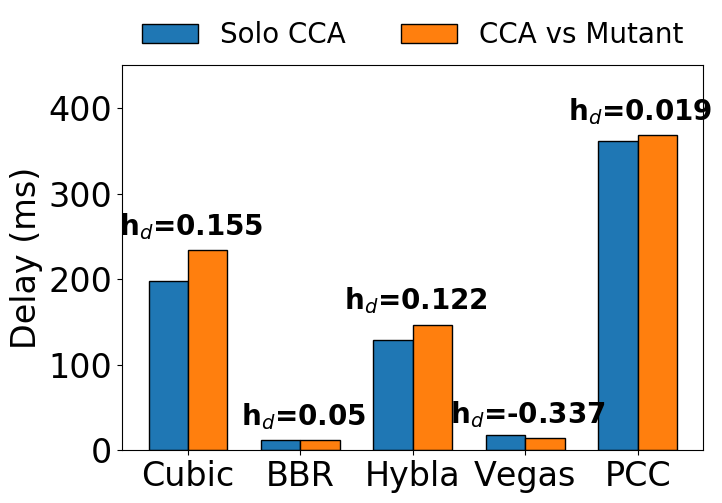

In [38]:
bar_labels = ['Cubic', 'BBR', 'Hybla', 'Vegas', 'PCC']
bar_positions = np.arange(len(bar_labels))
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Width of each bar
bar_width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7.5,5))

for j, type in enumerate(["solo", "against"]):
    # Calculate the x-coordinate for the current protocol's bars
    x = bar_positions + (j * bar_width)    
    # Plot the bars
    ax.bar(x, delay_dict[type], bar_width,  
           label="Solo CCA" if j==0 else f"CCA vs Mutant",
           edgecolor='black', color=bar_colors[j])
for i, val in enumerate(delay_dict["against"]):
    ax.text(x[i]-0.15, val + 10, f"h$_d$={round(h_delay_list[i], 3)}", 
            ha='center', va='bottom', fontsize=20, fontweight='bold')

# Set the x-axis ticks and labels
ax.set_xticks(bar_positions + (bar_width) / 2)
ax.set_xticklabels(bar_labels, fontsize=24)
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels

# Set the y-axis label
ax.set_ylabel('Delay (ms)', fontsize=24)
legend = ax.legend(fontsize=20, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=2, frameon=False)

# Set the chart title
# ax.set_title('Bar Plot for Different Protocols')

# Add a legend
# ax.legend(fontsize=22)
ax.set_ylim(0, 450)
# Add a legend for "h" values
# h_values = [f"h={h:.2f}" for h in h_list]  # Replace h_list with your actual list of "h" values
# h_legend = ax.legend(h_values, loc='upper left', bbox_to_anchor=(1, 1))
# ax.add_artist(h_legend)
# ax.grid(color='lightgray', linestyle='dashed', linewidth=0.5)
# Show the plot
filename = "tm.lte.driving.delay_harmness.png"
plt.savefig("/home/lorenzo/Desktop/mimic-2/analysis/plots/harmness/"+filename, bbox_inches='tight')

plt.show()